# sparc_flow with o²S²PARC

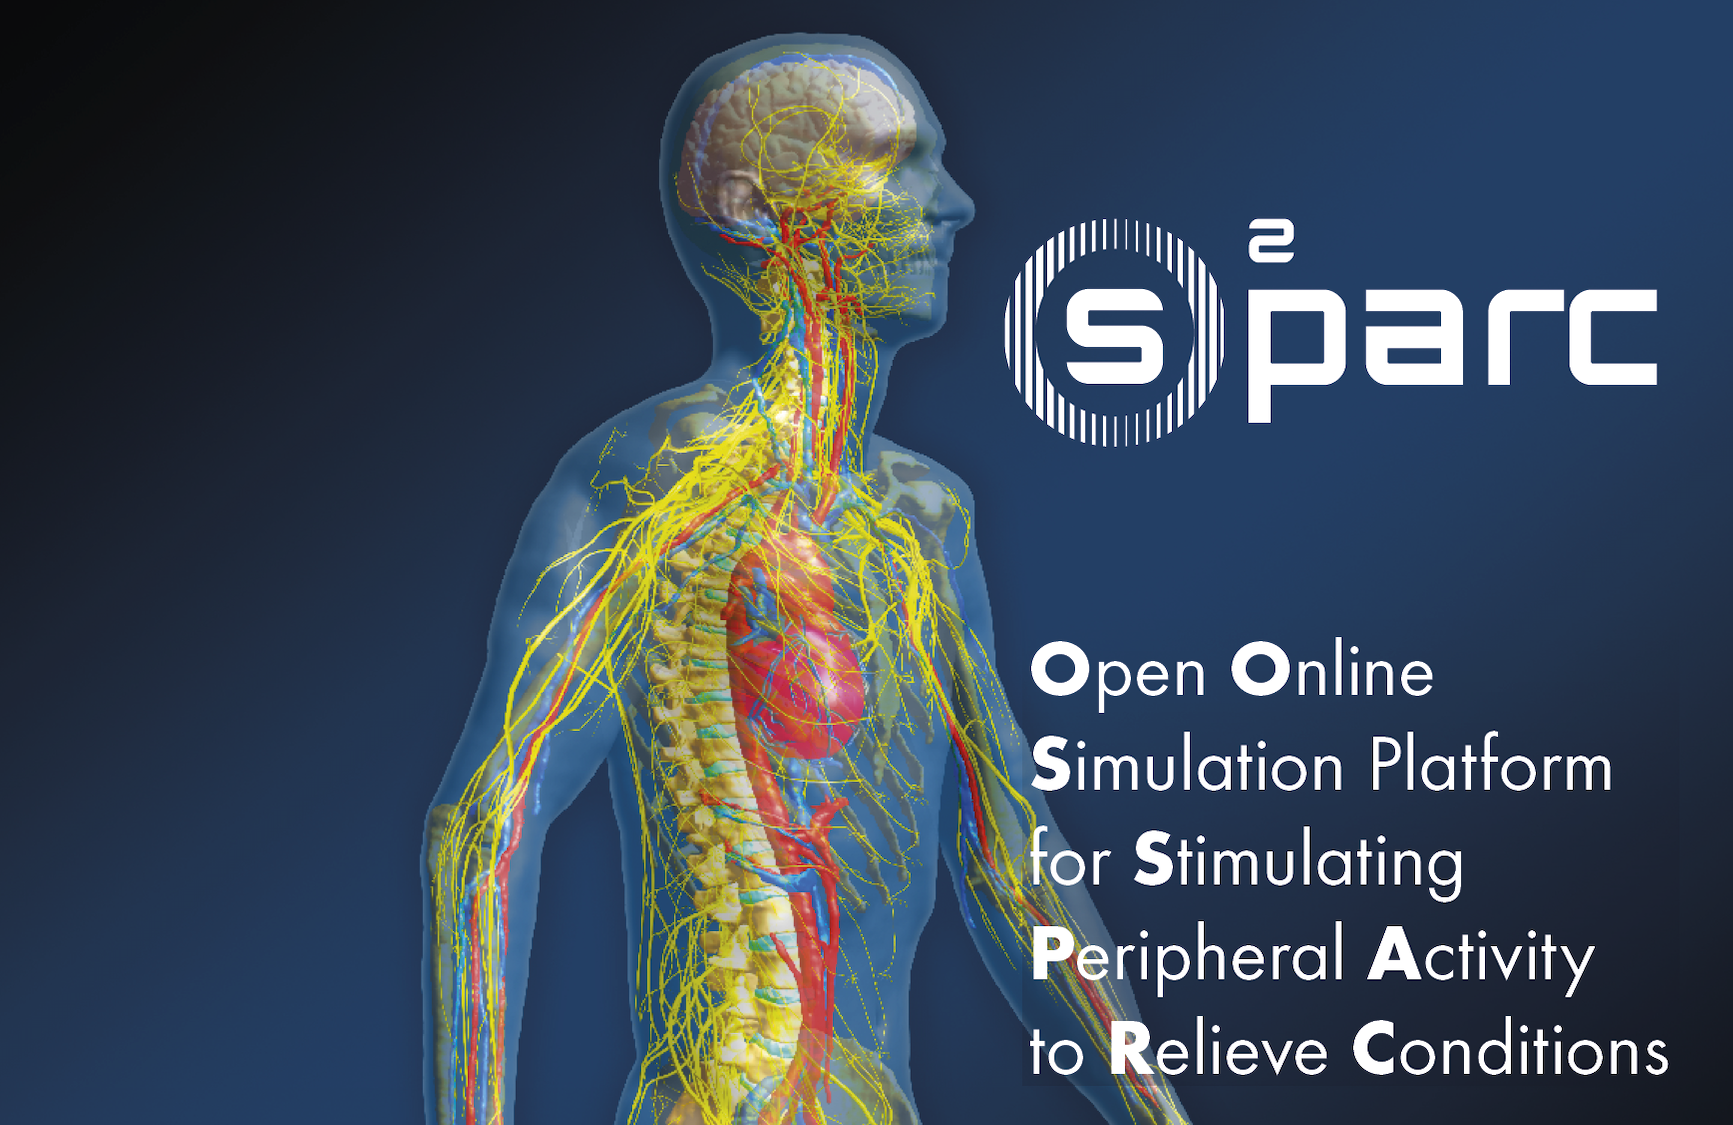

This tutorial uses sparc-flow to create and run the standardised workflow described in Tutorial 2 on oSPARC.

o²S²PARC (also osparc) provides users with an interactive approach to effectively develop, extend, validate, certify, document, store, share, and apply models, explore the impact of stimulation parameters, and create predictive, multi-scale, multi-physics models for a wide range of scenarios -- o²S²PARC docs

In a more simpler term, o²S²PARC gives user the capability to perform a wide variety of workflows on scientific data. Hence, it is important for sparc_flow like libraries to work in synergy with o²S²PARC like platforms.

In this tutorial, we are going through a simple usecase of sparc_flow on o²S²PARC. We will:
1. create a study
2. add 3 services (nodes): 2 File Picker nodes and 1 JupyterLab Math (Python+Octave) node
3. initialize File Picker nodes
4. add code in JupyterLab node to create a workflow in CWL, a standard workflow language, using sparc_flow
5. add code in JupyterLab node to run the workflow that was created in step 4 on o²S²PARC
6. add code in JupyterLab node to create a tool and a workflow in SDS structure


### Prerequisite to create a initial study on o²S²PARC

- o²S²PARC account (Request an account via Slack (Elisabetta Iavarone) or email fair-codeathon-support@sparc.science)
- Create time.txt and voltage_0.txt dummy data folders and zip the folders separately. The text files reside in sparc_flow repository's tutorials/tutorial_1 
- Please note that these two files are just dunmmy datasets and the actual datasets used to create the workflow is sourced from https://sparc.science/datasets/262?type=dataset. The datasets is too big to download so we use the dummy datasets only for illustration of the tutorials.

### Creating the initial study

Steps:

1. In the o²S²PARC dashboard, click on the Empty Study button
2. In the resulting window, click New node button
3. Pick File picker option from the list
4. Drag and drop the time.zip file
5. Repeat step 2, 3, and 4 for voltage_0.zip file as well
6. Click New node again and pick JupyterLab Math (Python+Octave) option from the list
7. Connect the two File Picker nodes to the input port of JupyterLab node from GUI as shown in Figure 1. (Connect the boxes representing the services using arrows from one port to another)
8. Double click on JupyterLab node, and it will switch the view to the interactive view.
9. Create a new Jupyter notebook in your workspace under this directory: workspace/2023-team-3/examples/sparc_workflow_example and assign the Python kernal to it, when prompted.
10. Add the following code to that notebook (as shown in Figure 2).

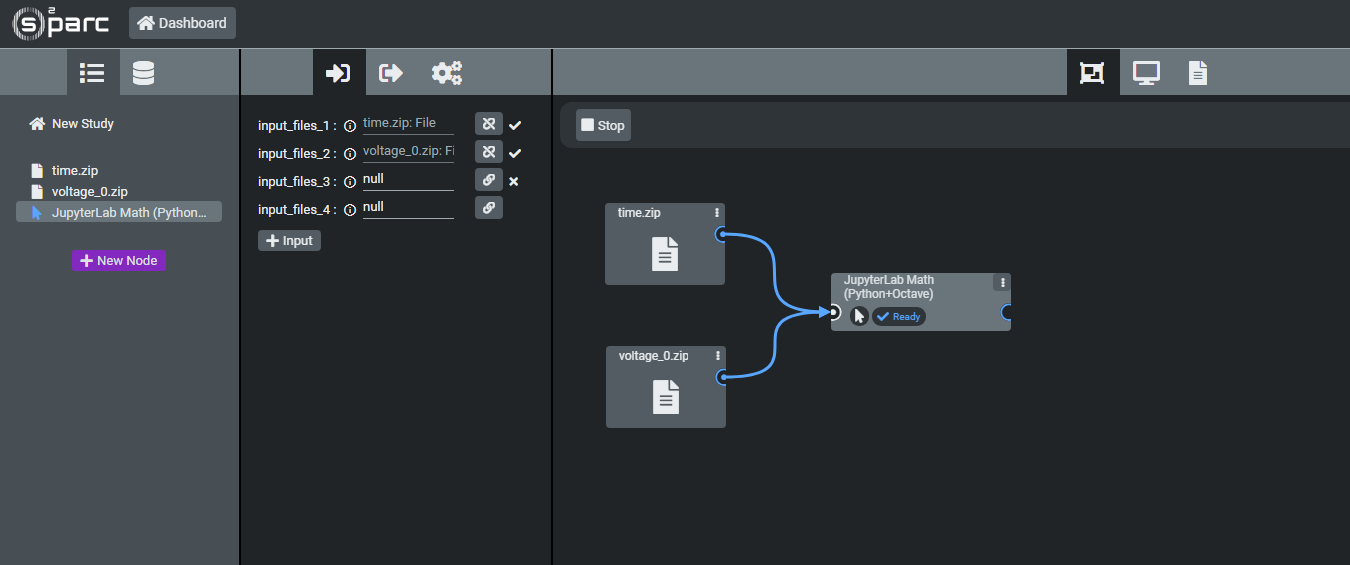
Figure 1

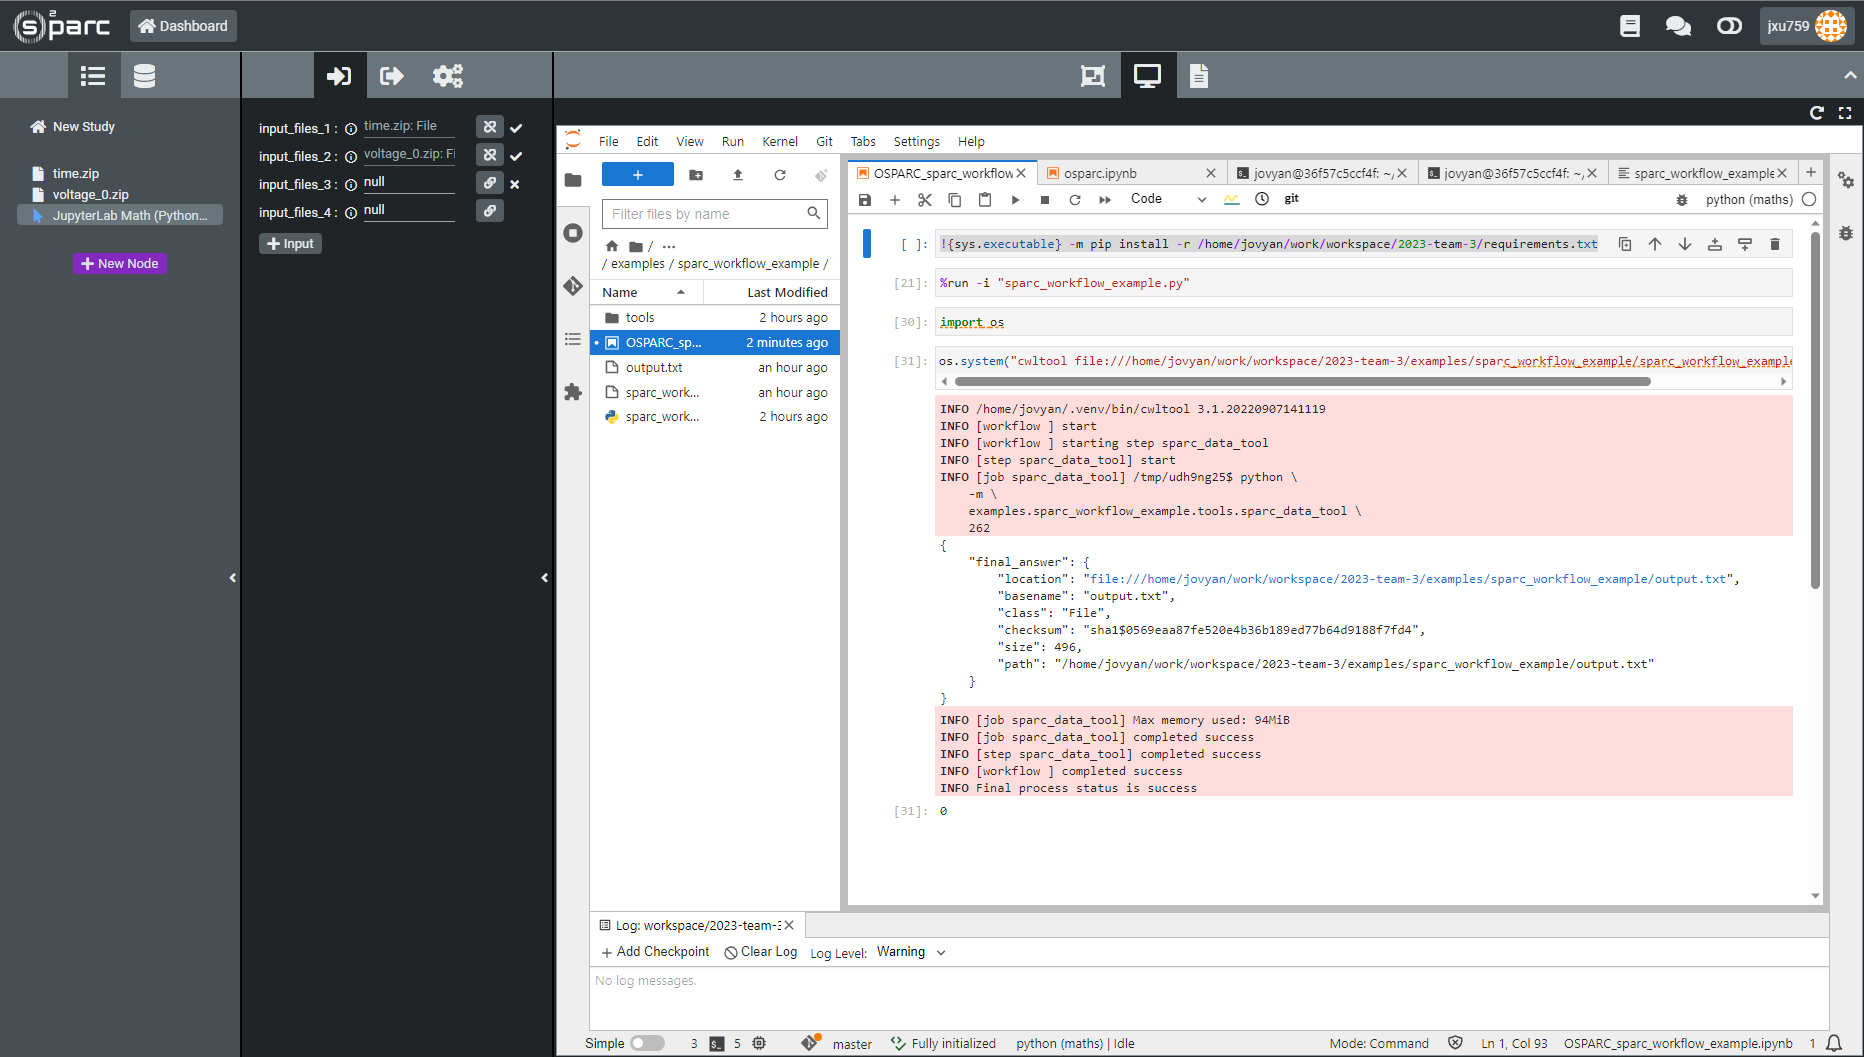
Figure 2

### Run sparc_flow demo code in o²S²PARC jupyter notebook
In this tutorial, we are going to investigate the capabilities of sparc-flow library in the context of o²S²PARC.

#### Requirement

In [ ]:
!{sys.executable} -m pip install -r /home/jovyan/work/workspace/2023-team-3/requirements.txt

Create a workflow in CWL

In [ ]:
%run -i "sparc_workflow_example.py"

Run the workflow by executing a Command Prompt Command from Python

In [ ]:
import os

In [ ]:
os.system("cwltool file:///home/jovyan/work/workspace/2023-team-3/examples/sparc_workflow_example/sparc_workflow_example.cwl --number=262") 